In [107]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import constants 
from matplotlib.patches import Patch
from ipywidgets import interact, IntSlider

#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 25
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [108]:
from ion_properties import lead,xenon,calcium


In [109]:
# context = xo.ContextCpu(omp_num_threads=4)
context = xo.ContextCpu()

line = xt.Line.from_json('sps.json')
particle_ref=line.particle_ref
line.build_tracker()

clight=constants.speed_of_light
circumference=line.get_length()

Loading line from dict:   0%|          | 0/38786 [00:00<?, ?it/s]

Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Loop over both sig_delta and emittance

In [110]:
# # # Load the data from the saved .npz file
# loaded_data = np.load('../linear_lattice/results/cooling_rates.npz')
# transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
# longitudinal_growth_rate=loaded_data['longitudinal_growth_rate']

# loaded_data = np.load('../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
# transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
# longitudinal_growth_rate=loaded_data['longitudinal_growth_rate']



lead zoom in contour plot

In [111]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# for i, ion_loop in tqdm(enumerate([lead])):
#     data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')
#     growth_rates_2d_x = data['growth_rates_2d_x']
#     growth_rates_2d_y = data['growth_rates_2d_y']
#     growth_rates_2d_z = data['growth_rates_2d_z']
#     sig_delta_list = data['sig_delta_list']
#     n_emitt_list = data['n_emitt_list']
#     total_intensity = data['total_intensity']

#     plt.figure(figsize=(12, 8))
#     plt.rcParams.update({'font.size': 25})

#     # Plot the contour plot
#     half_height = len(sig_delta_list) // 100
#     half_width = len(n_emitt_list) // 100
#     contour = plt.contourf(n_emitt_list[half_width:], sig_delta_list[half_height:], growth_rates_2d_x[half_height:, half_width:], cmap='viridis')
    
#     cbar = plt.colorbar(contour)
#     cbar.set_label('growth_rates_2d_x', fontsize=20)

#     plt.xlabel('geometrical emittance $\epsilon_x [\mu m]$', fontsize=20)
#     plt.ylabel('RMS dp/p', fontsize=20)
#     plt.title(f'Cooler growth rates: ({ion_loop.name}): {transverse_growth_rate_list[i]:.2f}')
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#     plt.tight_layout()

#     plt.show()


xenon growth rates

0it [00:00, ?it/s]

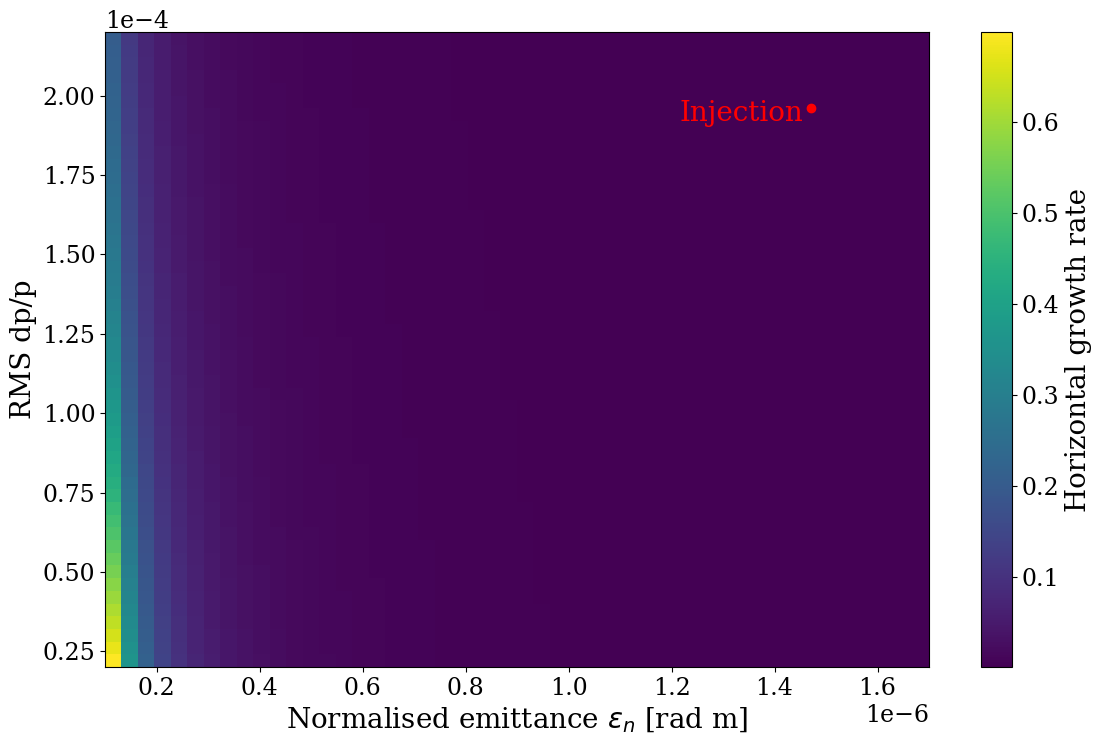

1it [00:00,  4.17it/s]


In [112]:
injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
injection_dp_p = 2e-4

for i,ion_loop in tqdm(enumerate([lead])):

    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    #max_growth_rate=np.maximum(growth_rates_2d_x,growth_rates_2d_y,growth_rates_2d_z)
    # max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    # max_growth_rate=growth_rates_2d_x
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']

    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})

    # Plot the heatmap
    plt.imshow(growth_rates_2d_x, extent=[n_emitt_list.min(), n_emitt_list.max(), sig_delta_list[0], sig_delta_list[-1]],
               aspect='auto', origin='lower', cmap='viridis',norm=None)
       
    cbar = plt.colorbar()
    cbar.set_label('Horizontal growth rate', fontsize=20)

    # Add injection point
    plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
    plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')

    #contour = plt.contour(geo_epsx_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors='red', linewidths=2)
    plt.xlabel('Normalised emittance $\\epsilon_n$ [rad m]', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.tight_layout()
    # plt.savefig('Lead_cooling_IBS_regime.png', dpi=300)
    plt.show()


<>:46: SyntaxWarning: invalid escape sequence '\e'
<>:46: SyntaxWarning: invalid escape sequence '\e'
/tmp/pkruyt/ipykernel_15399/2236283849.py:46: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)


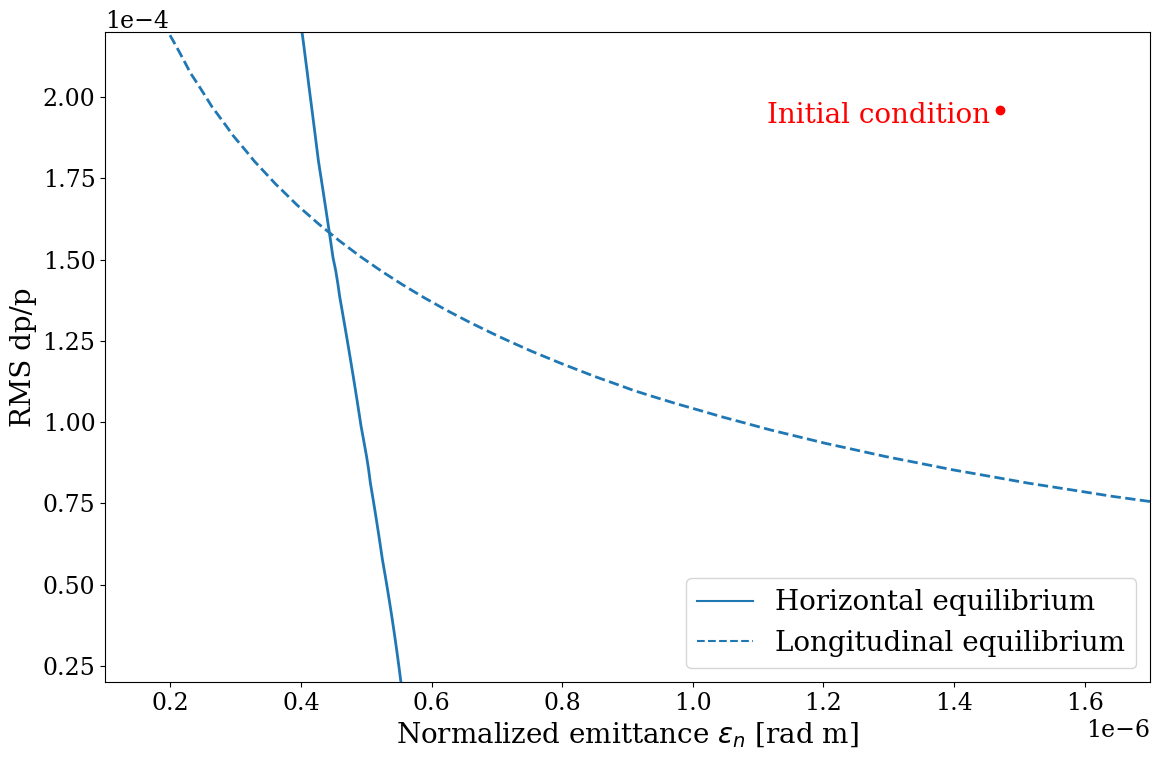

In [113]:
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Horizontal equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate([lead]):    
    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[i], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors=cycle[i], linestyles='--', linewidths=2)
    

plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Initial condition')
plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')


plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
# plt.savefig('figures/Equilibrium_emittance.png', dpi=300)
plt.show()

In [114]:
# print('transverse:',threshold_transverse)
# print('longitudinal:',threshold_longitudinal)


Draw arrows for cooling

compare IBS with full lattice

1it [00:00,  3.86it/s]

56
82
laser offset -0.03355704697986534 mm


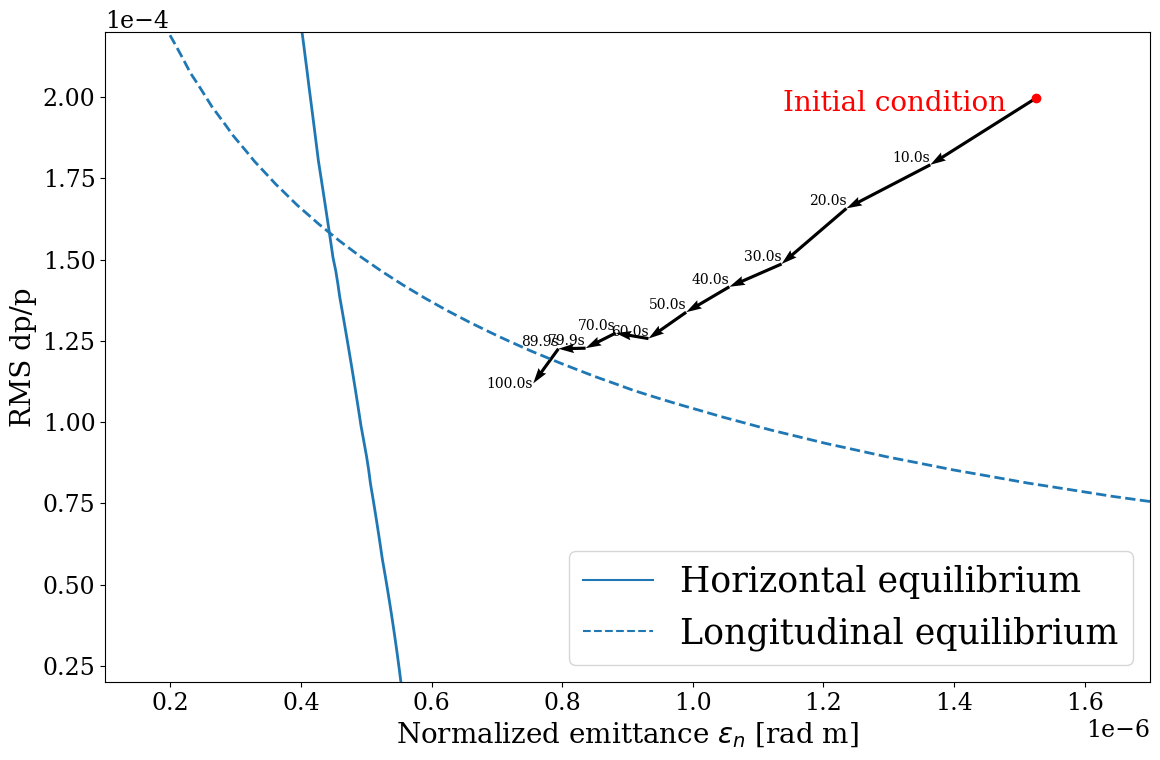

In [115]:
from tqdm import tqdm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate([lead])):    
    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'results/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time = linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    index_closest_to_40 = np.argmin(np.abs(time - 40))

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]
    
    # Plot the contour
    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    loaded_data = np.load(f'../results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    laser_x_list=loaded_data['laser_x_list']
   
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longitudinal_index = np.argmin(longitudinal_growth_rate_list)
    print(min_transverse_index)
    print(min_longitudinal_index)

    #69  #74=0
    laser_position_index = 74
    laser_offset = laser_x_list[laser_position_index]
    print('laser offset',laser_offset*1e3,'mm')
    threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
    threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                    colors=cycle[0], linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                    colors=cycle[0], linestyles='--', linewidths=2)
    


    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
    #                 colors=cycle[2], linewidths=2)   

    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
    #                 colors=cycle[2], linestyles='--', linewidths=2)


    # Define the number of segments for each arrow
    num_segments = 10
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
    # Plot each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_values[start_idx]
        end_x = emittance_x_values[end_idx]
        
        start_y = rms_dp_p_values[start_idx]
        end_y = rms_dp_p_values[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color='black', width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')
  

# Plotting the arrows on top completes, now let's adjust other settings        
injection_nemitt = emittance_x[0]
injection_dp_p = rms_dp_p[0]

plt.scatter(injection_nemitt, injection_dp_p, color='red', label='Initial condition')
plt.text(0.97*injection_nemitt, 0.98*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')        

plt.xlim([n_emitt_list[0], n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles=[
    Line2D([0], [0], linestyle='-', color=cycle[0],  label='Horizontal equilibrium '),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),
          
], loc='lower right')


plt.tight_layout()
#plt.savefig('figures/Equilibrium_emittance.png', dpi=300)
plt.show()

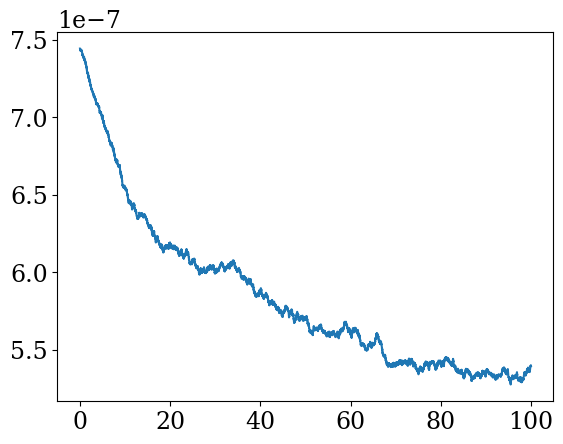

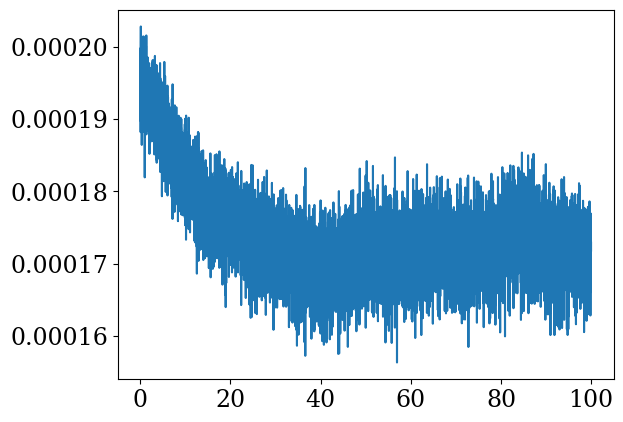

In [116]:
IBS_results = np.load(f'results/IBS/{ion_loop.name}_small.npz')

delta_IBS = IBS_results['delta']
emittance_x_IBS = IBS_results['emittance_x']
time_IBS = IBS_results['time']
rms_dp_p_IBS = np.std(delta_IBS, axis=1)

emittance_x_IBS.shape

# IBS_results = np.load(f'results/IBS/{ion_loop.name}.npz')

# delta_IBS = IBS_results['delta']
# emittance_x_IBS = IBS_results['emittance_x']
# time_IBS = IBS_results['time']
# rms_dp_p_IBS = np.std(delta_IBS, axis=1)

emittance_x_IBS.shape

plt.figure()
plt.plot(time_IBS,emittance_x_IBS)
plt.show()

plt.figure()
plt.plot(time_IBS,rms_dp_p_IBS)
plt.show()

compare IBS with linear representation

1it [00:00,  4.79it/s]

56
82
laser offset -0.03355704697986534 mm


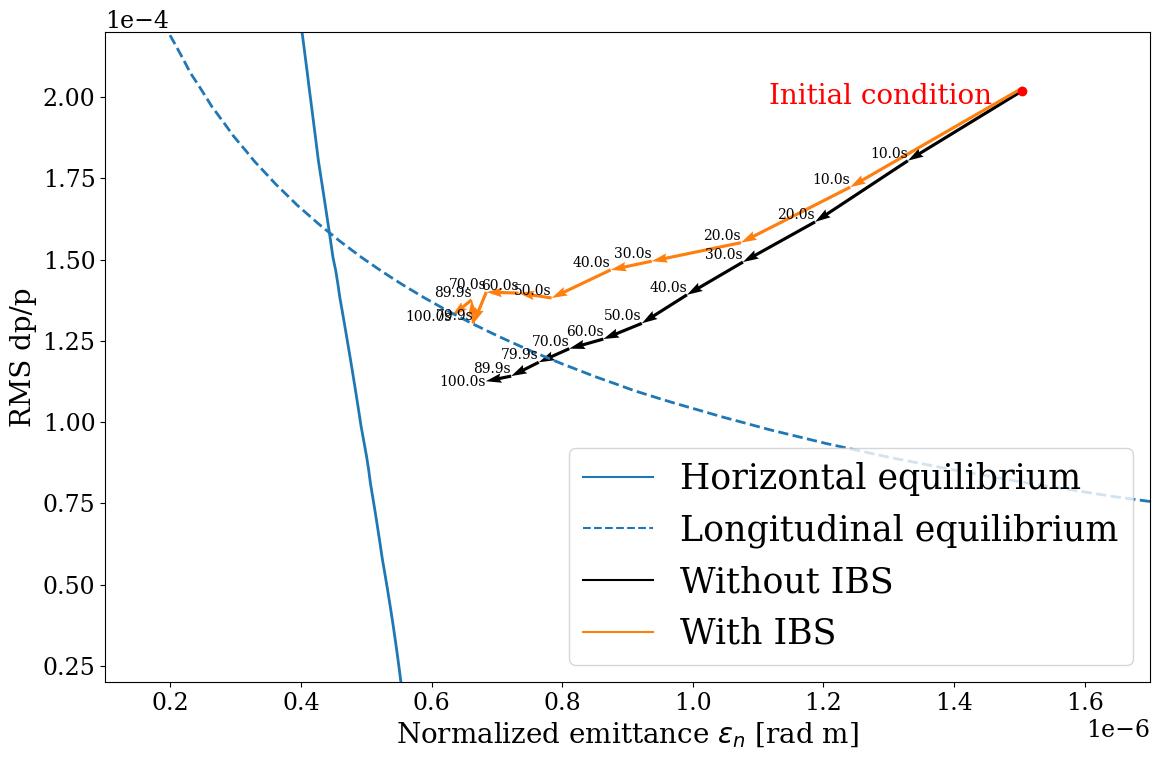

In [117]:
from tqdm import tqdm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate([lead])):    
    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'../results/transverse/{ion_loop.name}.npz')

    delta_linear = linear_results['delta']
    emittance_x_linear = linear_results['emittance_x']
    time_linear = linear_results['time']
    rms_dp_p_linear = np.std(delta_linear, axis=1)

    IBS_results = np.load(f'results/IBS/{ion_loop.name}.npz')

    delta_IBS = IBS_results['delta']
    emittance_x_IBS = IBS_results['emittance_x']
    time_IBS = IBS_results['time']
    rms_dp_p_IBS = np.std(delta_IBS, axis=1)

    index_closest_to_40 = np.argmin(np.abs(time_linear - 40))

    emittance_x_linear = emittance_x_linear[:]
    rms_dp_p__linear = rms_dp_p_linear[:]
    
    # Plot the contour
    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    loaded_data = np.load(f'../results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    laser_x_list=loaded_data['laser_x_list']
   
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longitudinal_index = np.argmin(longitudinal_growth_rate_list)
    print(min_transverse_index)
    print(min_longitudinal_index)

    #69  #74=0
    laser_position_index = 74
    laser_offset = laser_x_list[laser_position_index]
    print('laser offset',laser_offset*1e3,'mm')
    threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
    threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                    colors=cycle[0], linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                    colors=cycle[0], linestyles='--', linewidths=2)
    


    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
    #                 colors=cycle[2], linewidths=2)   

    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
    #                 colors=cycle[2], linestyles='--', linewidths=2)


    # Define the number of segments for each arrow
    num_segments = 10
    
    # Calculate the step size for each segment
    step_size = len(time_linear) // num_segments
    
    # Plot linear for each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time_linear) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_linear[start_idx]
        end_x = emittance_x_linear[end_idx]
        
        start_y = rms_dp_p__linear[start_idx]
        end_y = rms_dp_p__linear[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color='black', width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time_linear[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')

    step_size = len(time_IBS) // num_segments

    # Plot IBS for each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time_IBS) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_IBS[start_idx]
        end_x = emittance_x_IBS[end_idx]
        
        start_y = rms_dp_p_IBS[start_idx]
        end_y = rms_dp_p_IBS[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color=cycle[1], width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time_linear[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')

  

# Plotting the arrows on top completes, now let's adjust other settings        
injection_nemitt = emittance_x_linear[0]
injection_dp_p = rms_dp_p_linear[0]

plt.scatter(injection_nemitt, injection_dp_p, color='red', label='Initial condition')
plt.text(0.97*injection_nemitt, 0.98*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')        

plt.xlim([n_emitt_list[0], n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles=[
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Horizontal equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),
    Line2D([0], [0], linestyle='-', color='black', label='Without IBS'),
    Line2D([0], [0], linestyle='-', color=cycle[1], label='With IBS'),
], loc='lower right')


plt.tight_layout()
#plt.savefig('figures/Equilibrium_emittance.png', dpi=300)
plt.show()

also plot arrow with smaller initial emittances

1it [00:00,  2.78it/s]

56
82
laser offset -0.03355704697986534 mm


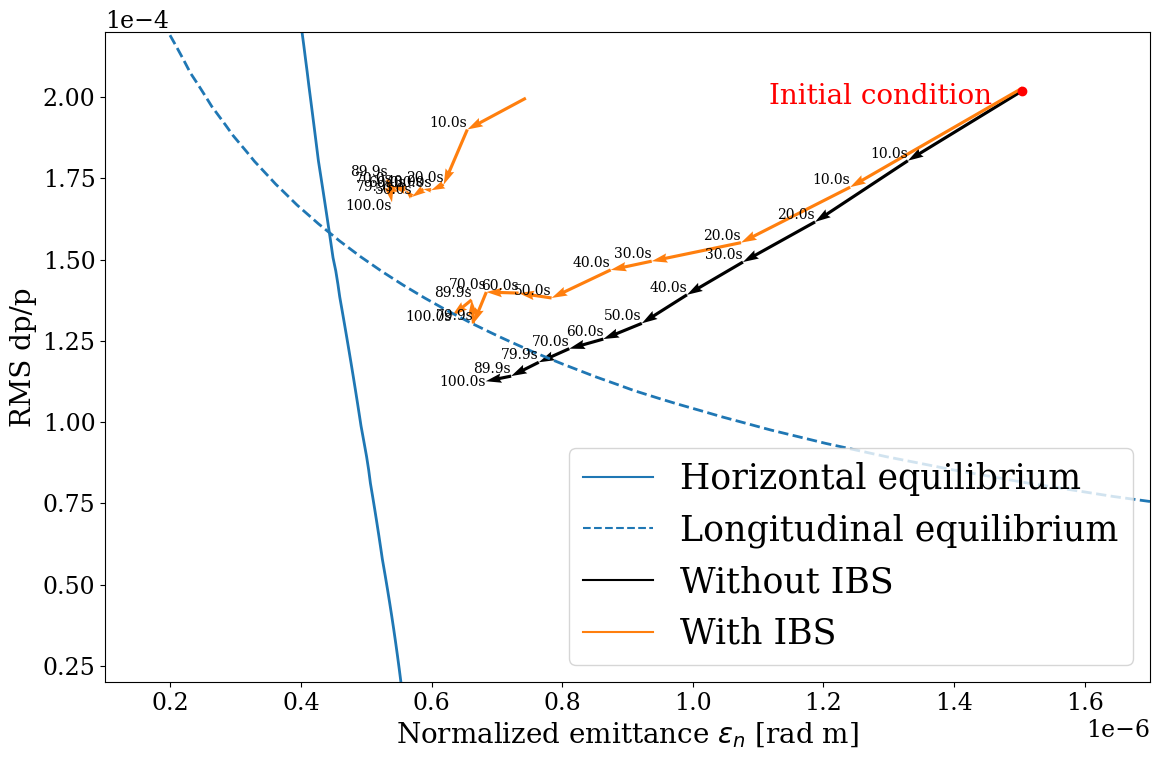

In [118]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate([lead])):    
    data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'../results/transverse/{ion_loop.name}.npz')

    delta_linear = linear_results['delta']
    emittance_x_linear = linear_results['emittance_x']
    time_linear = linear_results['time']
    rms_dp_p_linear = np.std(delta_linear, axis=1)
    emittance_x_linear = emittance_x_linear[:]
    rms_dp_p__linear = rms_dp_p_linear[:]

    index_closest_to_40 = np.argmin(np.abs(time_linear - 40))

    #load IBS results
    IBS_results = np.load(f'results/IBS/{ion_loop.name}.npz')

    delta_IBS = IBS_results['delta']
    emittance_x_IBS = IBS_results['emittance_x']
    time_IBS = IBS_results['time']
    rms_dp_p_IBS = np.std(delta_IBS, axis=1)

    #load IBS results small emittance
    IBS_small_results = np.load(f'results/IBS/{ion_loop.name}_small.npz')

    delta_IBS_small = IBS_small_results['delta']
    emittance_x_IBS_small = IBS_small_results['emittance_x']
    time_IBS_small = IBS_small_results['time']
    rms_dp_p_IBS_small = np.std(delta_IBS_small, axis=1)      
    
    # Plot the contour
    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = 0.5*data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    loaded_data = np.load(f'../results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    laser_x_list=loaded_data['laser_x_list']
   
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longitudinal_index = np.argmin(longitudinal_growth_rate_list)
    print(min_transverse_index)
    print(min_longitudinal_index)

    #69  #74=0
    laser_position_index = 74
    laser_offset = laser_x_list[laser_position_index]
    print('laser offset',laser_offset*1e3,'mm')
    threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
    threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                    colors=cycle[0], linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                    colors=cycle[0], linestyles='--', linewidths=2)
    


    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
    #                 colors=cycle[2], linewidths=2)   

    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
    #                 colors=cycle[2], linestyles='--', linewidths=2)


    # Define the number of segments for each arrow
    num_segments = 10
    
    # Calculate the step size for each segment
    step_size = len(time_linear) // num_segments
    
    # Plot linear for each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time_linear) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_linear[start_idx]
        end_x = emittance_x_linear[end_idx]
        
        start_y = rms_dp_p__linear[start_idx]
        end_y = rms_dp_p__linear[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color='black', width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time_linear[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')

    step_size = len(time_IBS) // num_segments

    # Plot IBS for each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time_IBS) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_IBS[start_idx]
        end_x = emittance_x_IBS[end_idx]
        
        start_y = rms_dp_p_IBS[start_idx]
        end_y = rms_dp_p_IBS[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color=cycle[1], width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time_linear[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')

    # Plot IBS with small emittance for each segment as a quiver plot
    for j in range(num_segments):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = min((j + 1) * step_size, len(time_IBS_small) - 1)
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_IBS_small[start_idx]
        end_x = emittance_x_IBS_small[end_idx]
        
        start_y = rms_dp_p_IBS_small[start_idx]
        end_y = rms_dp_p_IBS_small[end_idx]
        
        # Plot the quiver plot for the segment
        arrow = plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1,
                            scale_units='xy', angles='xy', color=cycle[1], width=0.003)
        
        # Add time annotation at the end of the arrow
        time_annotation_x = end_x
        time_annotation_y = end_y
        if j == num_segments - 1:  # for the last arrow
            time_annotation_text = "100.0s"
            time_annotation_y=0.98*time_annotation_y
        else:
            time_annotation_text = f"{time_linear[end_idx]:.1f}s"
        plt.text(time_annotation_x, time_annotation_y, time_annotation_text, color='black', fontsize=10, ha='right', va='bottom')
  

# Plotting the arrows on top completes, now let's adjust other settings        
injection_nemitt = emittance_x_linear[0]
injection_dp_p = rms_dp_p_linear[0]

plt.scatter(injection_nemitt, injection_dp_p, color='red', label='Initial condition')
plt.text(0.97*injection_nemitt, 0.98*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')        

plt.xlim([n_emitt_list[0], n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles=[
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Horizontal equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),
    Line2D([0], [0], linestyle='-', color='black', label='Without IBS'),
    Line2D([0], [0], linestyle='-', color=cycle[1], label='With IBS')
], loc='lower right')


plt.tight_layout()
#plt.savefig('figures/Equilibrium_emittance.png', dpi=300)
plt.show()

look at phase spaces

In [119]:
data = np.load(f'../results/IBS_bunched/{ion_loop.name}.npz')
linear_results = np.load(f'../results/transverse/{ion_loop.name}.npz')

delta_linear = linear_results['delta']
emittance_x_linear = linear_results['emittance_x']
time_linear = linear_results['time']
rms_dp_p_linear = np.std(delta_linear, axis=1)
emittance_x_linear = emittance_x_linear[:]
rms_dp_p__linear = rms_dp_p_linear[:]

index_closest_to_40 = np.argmin(np.abs(time_linear - 40))

#load IBS results
IBS_results = np.load(f'results/IBS/{ion_loop.name}.npz')

delta_IBS = IBS_results['delta']
emittance_x_IBS = IBS_results['emittance_x']
time_IBS = IBS_results['time']
rms_dp_p_IBS = np.std(delta_IBS, axis=1)

x_IBS = IBS_results['x']
px_IBS = IBS_results['px']

#load IBS results small emittance
IBS_small_results = np.load(f'results/IBS/{ion_loop.name}_small.npz')

delta_IBS_small = IBS_small_results['delta']
emittance_x_IBS_small = IBS_small_results['emittance_x']
time_IBS_small = IBS_small_results['time']
rms_dp_p_IBS_small = np.std(delta_IBS_small, axis=1)      

all_data = np.concatenate(delta_IBS)
x_min, x_max = all_data.min(), all_data.max()

bins = 50

# Determine the maximum y value across all histograms
hist_counts = [np.histogram(data, bins=bins)[0] for data in delta_linear]
y_max = max(max(counts) for counts in hist_counts)

# Function to calculate RMS of the core
def core_rms(delta, percentile=95):
    lower_bound = np.percentile(delta, (100 - percentile) / 2)
    upper_bound = np.percentile(delta, 100 - (100 - percentile) / 2)
    core_values = delta[(delta >= lower_bound) & (delta <= upper_bound)]
    return np.std(core_values)

rms_dp_p_IBS_core = np.array([core_rms(delta) for delta in delta_IBS])
rms_dp_p_linear_core = np.array([core_rms(delta) for delta in delta_linear])

# Function to plot histograms at a given turn and overlay RMS as width
def plot_histogram(turn):
    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 20})
    plt.title(f'With IBS: Time {time_IBS[turn]:.1f}')
    
    # Plot histograms
    plt.hist(delta_IBS[turn], bins=bins, histtype='step', label='With IBS')
    plt.hist(delta_linear[turn], bins=bins, histtype='step', label='Without IBS')
    
    # Plot RMS as vertical lines
    plt.axvline(x=rms_dp_p_IBS_core[turn], color='blue', linestyle='--', label='RMS With IBS')
    plt.axvline(x=-rms_dp_p_IBS_core[turn], color='blue', linestyle='--')
    plt.axvline(x=rms_dp_p_linear_core[turn], color='orange', linestyle='--', label='RMS Without IBS')
    plt.axvline(x=-rms_dp_p_linear_core[turn], color='orange', linestyle='--')
    
    plt.xlim(x_min, x_max)  # Set the x-axis limits
    plt.ylim(0, y_max)  # Set the y-axis limits
    plt.ylabel('Count')
    plt.xlabel('dp/p ')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

interact(plot_histogram, turn=IntSlider(min=0, max=len(time)-1, step=1, value=0))


interactive(children=(IntSlider(value=0, description='turn', max=10015), Output()), _dom_classes=('widget-inte…

<function __main__.plot_histogram(turn)>

find bunch length and momentum spread at the end of the tracking

In [120]:
#load IBS results small emittance
IBS_small_results = np.load(f'results/IBS/{ion_loop.name}_small.npz')

delta_IBS_small = IBS_small_results['delta']
emittance_x_IBS_small = IBS_small_results['emittance_x']
#emittance_y_IBS_small = IBS_small_results['emittance_y']
time_IBS_small = IBS_small_results['time']
zeta_IBS_small = IBS_small_results['zeta']

rms_dp_p_IBS_small = np.std(delta_IBS_small, axis=1)     
sigma_z_IBS_small = np.std(zeta_IBS_small, axis=1)     

# Define halfway point index
index = len(sig_delta_list) // 5
index = 0

# Extract the halfway values for dp_p, sigma_z, and emittance
final_dp_p = rms_dp_p_IBS_small[index]
final_sigma_z = sigma_z_IBS_small[index]
final_emittance = emittance_x_IBS_small[index]

print('final_dp_p=',final_dp_p)
print('final_sigma_z=',final_sigma_z)
print('final_emittance=',final_emittance)

final_dp_p= 0.0001996984525769398
final_sigma_z= 0.06115130007102781
final_emittance= 7.442492234339055e-07


In [121]:
len(sigma_z_IBS_small)

10016

look at longitudinal emittance instead of rms dp/p

In [122]:
linear_results = np.load(f'results/{ion_loop.name}.npz')

delta = linear_results['delta']
zeta=linear_results['zeta']
emittance_x = linear_results['emittance_x']
time = linear_results['time']
rms_dp_p = np.std(delta, axis=1)

# Calculate mean and standard deviation along the particle axis (axis=1)
mean_z = np.mean(zeta, axis=1)
mean_delta = np.mean(delta, axis=1)
sigma_z = np.std(zeta, axis=1)
sigma_delta = np.std(delta, axis=1)

# Calculate the covariance between zeta and delta for each turn
cov_z_delta = np.mean(zeta * delta, axis=1) - mean_z * mean_delta

# Calculate longitudinal emittance for each turn
longitudinal_emittance = np.sqrt(sigma_z**2 * sigma_delta**2 - cov_z_delta**2)

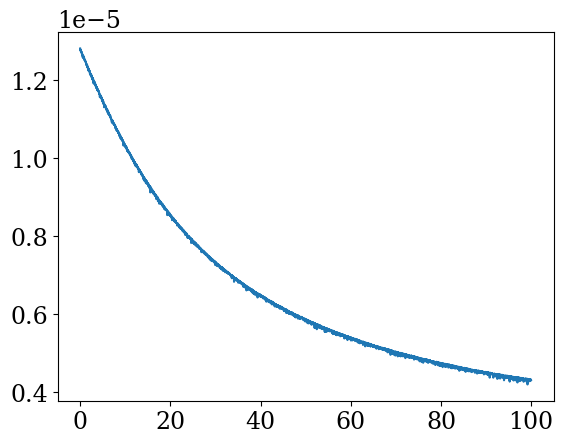

In [123]:
plt.figure()
plt.plot(time,longitudinal_emittance)
plt.show()